### IMPORTING LIBRARIES

In [2]:
import os, sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

sns.set()
import warnings
warnings.filterwarnings('ignore')


### READING THE DATASET

In [4]:
df = pd.read_csv('spam.tsv', sep='\t')

In [5]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


### CHECKING FOR NULL VALUES

In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


### CHECKING FOR BALANCED/UNBALANCED DATA ON DEPENDENT VARIABLE

In [10]:
df['label'].value_counts(normalize=True)*100

label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

# We could observe that not spam is having 86% data which is highly imbalanced

In [12]:
#its a imbalalnce data
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']


In [13]:
ham.shape


(4825, 4)

In [14]:
spam.shape

(747, 4)

# Undersampling the imbalance data

In [16]:

ham1 = ham.sample(spam.shape[0])
ham1

,label,message,length,punct
377,ham,You could have seen me..i did't recognise you ...,53,6
3880,ham,She left it very vague. She just said she woul...,257,7
2891,ham,Shuhui has bought ron's present it's a swatch ...,54,5
644,ham,Ya very nice. . .be ready on thursday,37,3
3,ham,U dun say so early hor... U c already then say...,49,6
...,...,...,...,...
4503,ham,Wot is u up 2 then bitch?,25,1
1737,ham,I will come tomorrow di,23,0
2019,ham,Ya it came a while ago,22,0
2541,ham,"They said if its gonna snow, it will start aro...",112,3


# Balance your data whrere target value is spam or ham

In [18]:

df = pd.concat([ham1, spam], ignore_index=True)
df.shape

(1494, 4)

In [19]:
df['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

(array([ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  3.,  0.,  1.,  1.,
         2.,  1.,  1.,  4.,  4.,  2.,  0.,  0.,  1.,  0.,  1.,  3.,  1.,
         4.,  4.,  6.,  3.,  2.,  0.,  6.,  2.,  3.,  0.,  5.,  0.,  1.,
         5.,  4.,  9.,  2.,  4.,  9.,  6.,  6.,  3., 10.,  1., 11., 10.,
         5., 10.,  3., 10., 13., 14., 27., 18., 23., 25., 27., 32., 32.,
        18., 49., 58., 68., 76., 65.,  6.,  8.,  1.,  2.,  2.,  2.,  2.,
         1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 13. ,  15.1,  17.2,  19.3,  21.4,  23.5,  25.6,  27.7,  29.8,
         31.9,  34. ,  36.1,  38.2,  40.3,  42.4,  44.5,  46.6,  48.7,
         50.8,  52.9,  55. ,  57.1,  59.2,  61.3,  63.4,  65.5,  67.6,
         69.7,  71.8,  73.9,  76. ,  78.1,  80.2,  82.3,  84.4,  86.5,
         88.6,  90.7,  92.8,  94.9,  97. ,  99.1, 101.2, 103.3, 105.4,
        107.5, 109.6, 111.7, 113.8, 115.9, 118. , 120.1, 122.2, 124.3,
        

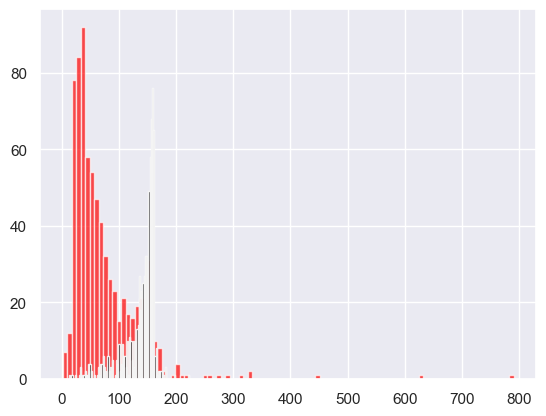

In [20]:
plt.hist(df[df['label']=='ham']['length'], bins = 100, alpha =0.7, color='red')
plt.hist(df[df['label']=='spam']['length'], bins = 100, alpha =0.9, color='black')

# From the above chart we could see the length of the mail for Ham is larger than Spam mails ham touches up 120 and spam touching 78

(array([ 23.,   0.,   0.,  26.,   0.,   0.,   0.,  73.,   0.,   0.,   0.,
        115.,   0.,   0.,   0.,  77.,   0.,   0.,   0.,  67.,   0.,   0.,
          0.,  86.,   0.,   0.,  74.,   0.,   0.,   0.,  66.,   0.,   0.,
          0.,  49.,   0.,   0.,   0.,  27.,   0.,   0.,   0.,  17.,   0.,
          0.,   0.,  22.,   0.,   0.,   0.,  14.,   0.,   0.,   2.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14

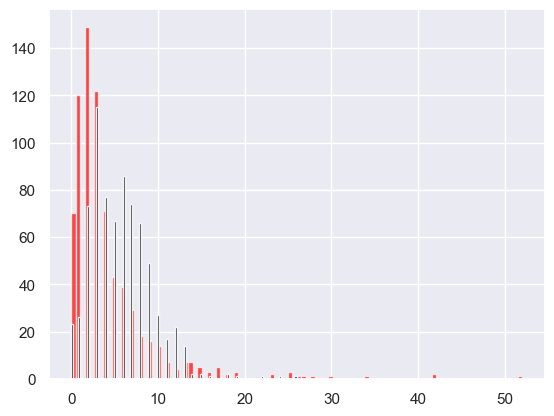

In [22]:
plt.hist(df[df['label']=='ham']['punct'], bins = 100, alpha =0.7, color='red')
plt.hist(df[df['label']=='spam']['punct'], bins = 100, alpha =0.9, color='black')

# Spam message tends to have lower punctuations comparing not spam message

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df['message'],df['label'], test_size=0.3, random_state=42)

In [26]:
x_train.shape

(1045,)

In [27]:
#buildng NLP Model to ensure your text variable gets changed to vector Variable

#text analytics using Spam detection


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#pipeline package to merge NLP and Machine Learning together
from sklearn.pipeline import Pipeline



In [164]:
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

# Define hyperparameters to tune
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],  
    'classifier__max_depth': [None, 10, 20],      
    'classifier__min_samples_split': [2, 5, 10],  
    'classifier__min_samples_leaf': [1, 2, 4]     
}

# Perform Grid Search
rf_grid_search = RandomizedSearchCV(rf_pipeline, rf_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit on training data
rf_grid_search.fit(x_train, y_train)

# Best Parameters
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Random Forest: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None}


In [166]:
rf_pipeline_best = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=200,min_samples_split=10,min_samples_leaf=1,max_depth=None))
])

rf_pipeline_best.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier',
                 RandomForestClassifier(min_samples_split=10,
                                        n_estimators=200))])

In [168]:
y_pred_train =  rf_pipeline_best.predict(x_train)
y_pred_test =  rf_pipeline_best.predict(x_test)


In [170]:
y_pred_test

array(['spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham',
       'spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham',
       'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'spam',
       'spam', 'spam', 'ham', 'spam', 'ham',

In [172]:
y_test

949     spam
900     spam
1339    spam
983     spam
958     spam
        ... 
1493    spam
1006    spam
522      ham
199      ham
881     spam
Name: label, Length: 449, dtype: object

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [174]:
print(confusion_matrix(y_train, y_pred_train))
print("***************")
print(confusion_matrix(y_test, y_pred_test))

[[530   0]
 [  1 514]]
***************
[[216   1]
 [ 19 213]]


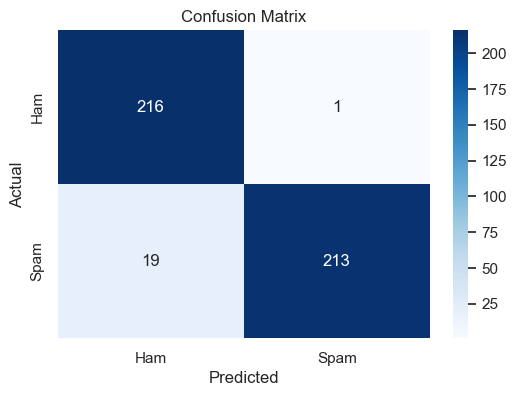

In [176]:
cm = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [178]:
print(classification_report(y_train, y_pred_train))
print("***************")
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       530
        spam       1.00      1.00      1.00       515

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045

***************
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       217
        spam       1.00      0.92      0.96       232

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [180]:
print(accuracy_score(y_train, y_pred_train))
print("***************")
print(accuracy_score(y_test, y_pred_test))

0.999043062200957
***************
0.955456570155902


In [38]:
#6% variance in train and testing data, if its >=10% then its not a good model

In [39]:
####using SVM ML Model

In [126]:
classifier1 = Pipeline([
    ('TF-IDF', TfidfVectorizer()),
    ('classifier', SVC())
])

In [142]:
from sklearn.model_selection import RandomizedSearchCV
# Define hyperparameter grid for SVM
param_grid_svm = {
    'TF-IDF__ngram_range': [(1,1), (1,2), (1,3)],
    'classifier__C': [0.1, 1, 10, 100],  # Regularization parameter
    'classifier__kernel': ['linear', 'rbf', 'poly'],  # Different kernel functions
    'classifier__gamma': ['scale', 'auto']  # Kernel coefficient
}

# Perform Grid Search
grid_search_svm = RandomizedSearchCV(classifier1, param_grid_svm, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_svm.fit(x_train, y_train)

# Best Parameters & Accuracy
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Accuracy:", grid_search_svm.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'classifier__kernel': 'rbf', 'classifier__gamma': 'scale', 'classifier__C': 100, 'TF-IDF__ngram_range': (1, 2)}
Best Accuracy: 0.967464114832536


In [146]:
best_svm = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('classifier', SVC(kernel='rbf', gamma='scale', C=100))
])

best_svm.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('classifier', SVC(C=100))])

In [158]:
y_pred_svm = best_svm.predict(x_test)
y_pred_svm_train = best_svm.predict(x_train)
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Train Accuracy:", accuracy_score(y_train, y_pred_svm_train))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Test Accuracy: 0.9643652561247216
Train Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         ham       0.94      1.00      0.96       217
        spam       1.00      0.94      0.96       232

    accuracy                           0.96       449
   macro avg       0.97      0.97      0.96       449
weighted avg       0.97      0.96      0.96       449



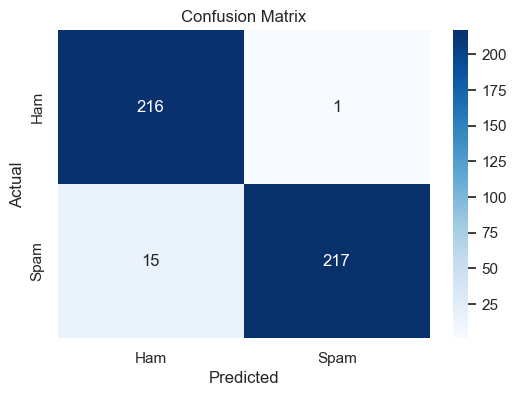

In [154]:
cm = confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [45]:
#XGBoost Classifier
!pip install xgboost 


In [46]:
from xgboost import XGBClassifier

In [190]:
y_train = y_train.map({'ham': 0, 'spam': 1})
y_test = y_test.map({'ham': 0, 'spam': 1})

In [192]:
xgb_pipeline = Pipeline([
    ('TF-IDF', TfidfVectorizer()),
    ('classifier', XGBClassifier(eval_metric='logloss'))
])

# Define parameter grid
param_grid = {
    'TF-IDF__ngram_range': [(1,1), (1,2)], 
    'classifier__n_estimators': [100, 200, 300],  
    'classifier__max_depth': [3, 6, 9],  
    'classifier__learning_rate': [0.01, 0.1, 0.2], 
    'classifier__gamma': [0, 0.1, 0.2]
}

# Grid search with 5-fold cross-validation
grid_xgb = RandomizedSearchCV(xgb_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_xgb.fit(x_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_xgb.best_params_)
print("Best Accuracy:", grid_xgb.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.2, 'classifier__gamma': 0.1, 'TF-IDF__ngram_range': (1, 2)}
Best Accuracy: 0.9282296650717703


In [204]:
xgb_pipeline_best = Pipeline([
    ('TF-IDF', TfidfVectorizer(ngram_range=(1, 2))), 
    ('classifier', XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.2, gamma=0.1))
])

xgb_pipeline_best.fit(x_train, y_train)

pred_tr = xgb_pipeline_best.predict(x_train)
pred_test11 = xgb_pipeline_best.predict(x_test)

In [206]:
print(confusion_matrix(y_train, pred_tr))
print("***************")
print(confusion_matrix(y_test, pred_test11))

[[530   0]
 [  1 514]]
***************
[[215   2]
 [ 29 203]]


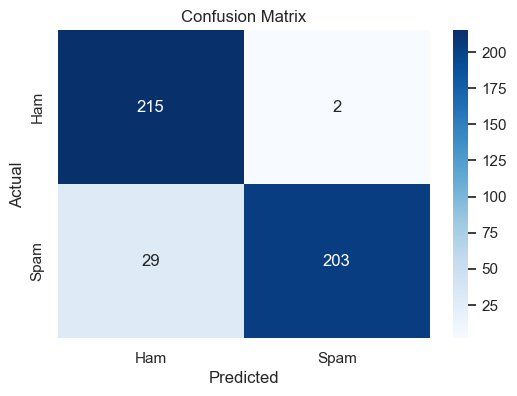

In [208]:
cm = confusion_matrix(y_test,pred_test11)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [210]:
from sklearn.metrics import roc_curve, auc

rf_prob = rf_pipeline_best.predict_proba(x_test)[:, 1] 
svm_prob = best_svm.decision_function(x_test)  
xgb_prob = xgb_pipeline_best.predict_proba(x_test)[:, 1]  

# Compute ROC curve and AUC score
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_prob)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_prob)

rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)

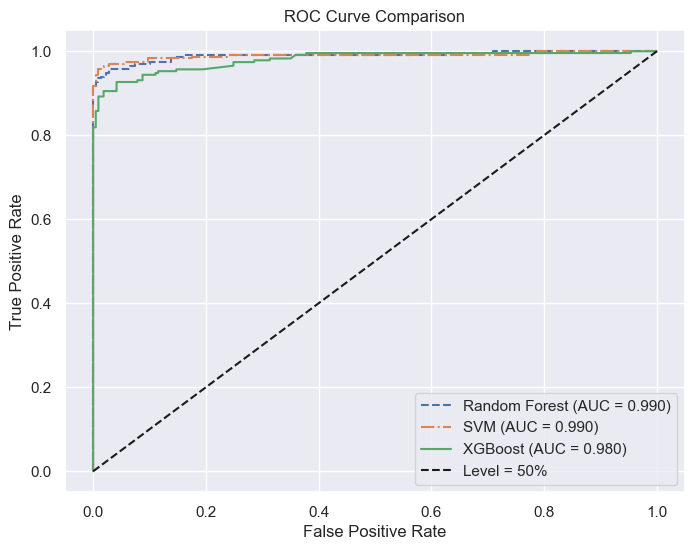

In [214]:
plt.figure(figsize=(8, 6))

# Plot ROC for each model
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})', linestyle='--')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.3f})', linestyle='-.')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.3f})', linestyle='-')

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', label='Level = 50%')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')

# Show plot
plt.show()

# We are using RandomForest Algorithm for the deployment

In [52]:
df2 = pd.read_csv('spam.tsv', sep='\t')

In [216]:
import joblib
joblib.dump(rf_pipeline_best, 'spam_classifier.pkl')

['spam_classifier.pkl']